Columns in dataset:
 ['Car Series', 'Brand', 'Sales Year', 'Sales Month', 'Car Series Type', 'Brand Energy Type', 'Car Size', 'Brand Origin Country', 'First Launch Year', 'Brand Founded Year', 'Brand Entry to China Year', 'Sales']

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39496 entries, 0 to 39495
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car Series                 39496 non-null  object
 1   Brand                      39496 non-null  object
 2   Sales Year                 39496 non-null  int64 
 3   Sales Month                39496 non-null  int64 
 4   Car Series Type            39496 non-null  object
 5   Brand Energy Type          39496 non-null  object
 6   Car Size                   39496 non-null  object
 7   Brand Origin Country       39496 non-null  object
 8   First Launch Year          39496 non-null  int64 
 9   Brand Founded Year         39496 non

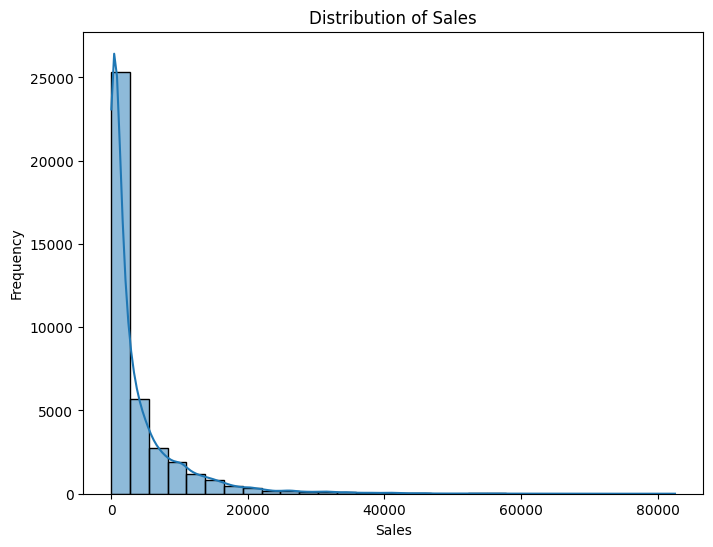

⚠️ Column '裸车价格' not found. Skipping price-related plots.


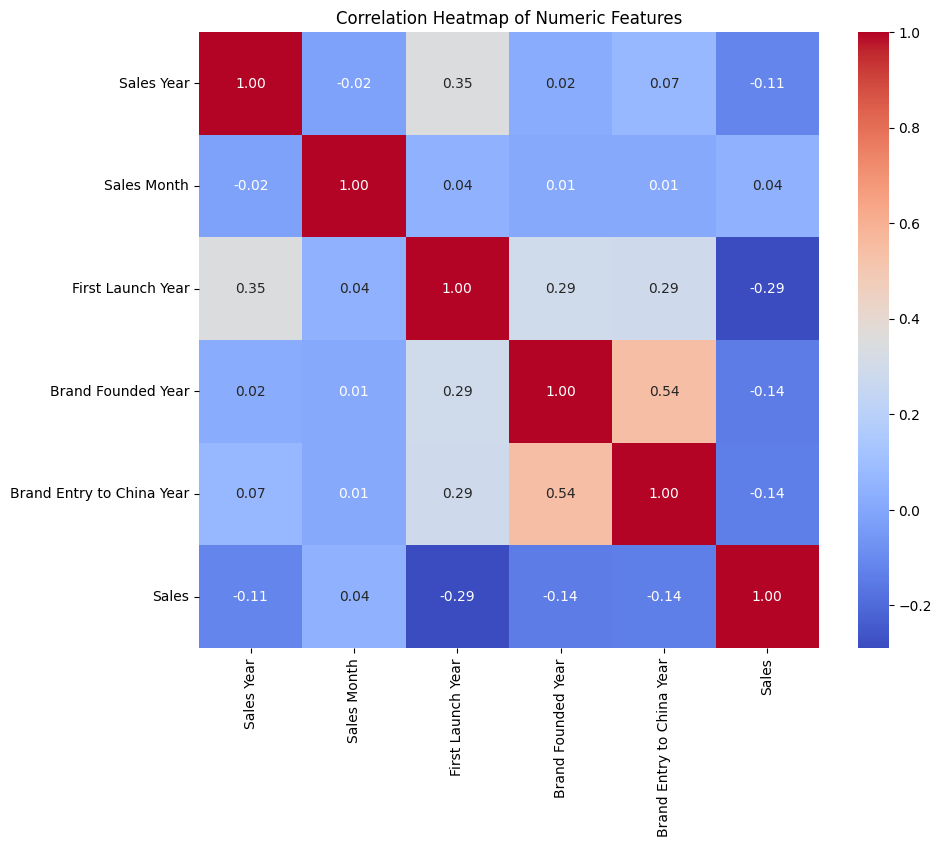

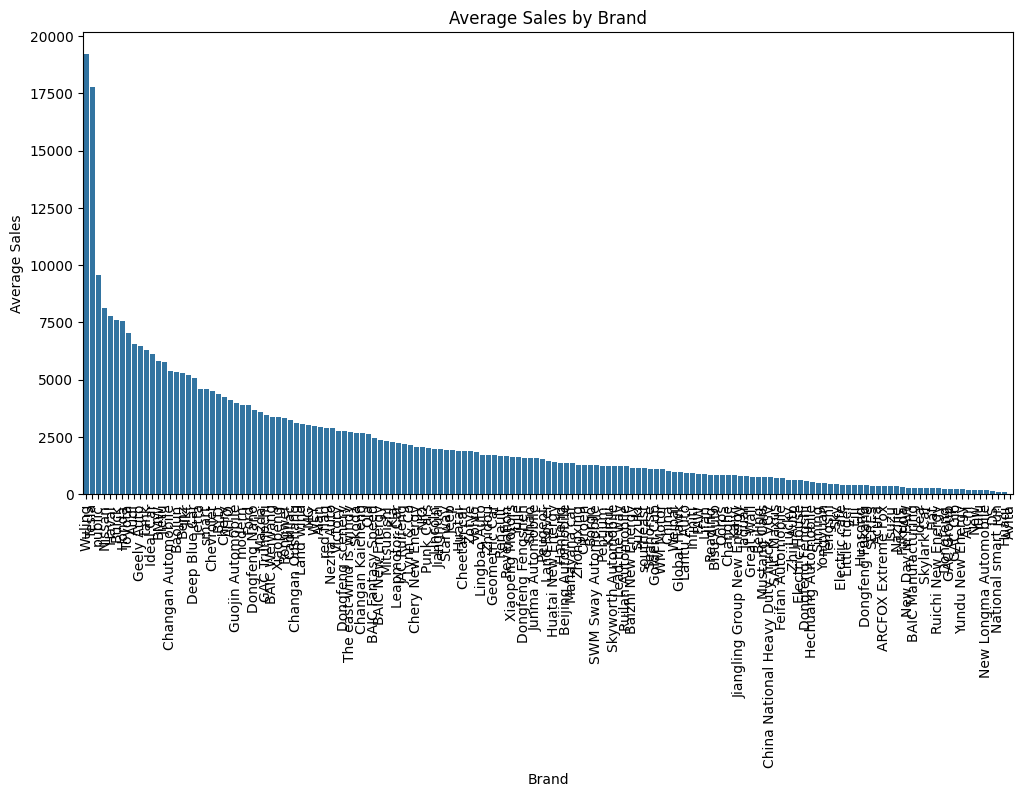

In [3]:
# ==============================
# Car Sales Data Visualization
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_excel("Sales_English_Translated.xlsx")

# 2. Inspect dataset
print("Columns in dataset:\n", df.columns.tolist())
print("\nBasic Info:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe(include='all'))

# ------------------------------------------------------
# UPDATE THESE VARIABLES TO MATCH YOUR COLUMN NAMES
# ------------------------------------------------------
# Example: if your Excel has "裸车价格" instead of "Official Price", update here
sales_col = "Sales"
brand_col = "Brand"
year_col = "Year"
month_col = "Month"
price_col = "裸车价格"    # <-- change if needed (e.g. "指导价", "Official_Price")

# 3. Histogram of Sales distribution
plt.figure(figsize=(8,6))
sns.histplot(df[sales_col], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# 4. Boxplot of Price distribution per Brand
if price_col in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=brand_col, y=price_col, data=df)
    plt.xticks(rotation=90)
    plt.title("Price Distribution per Brand")
    plt.show()

    # Scatterplot: Sales vs Price
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=price_col, y=sales_col, hue=brand_col, data=df, alpha=0.7)
    plt.title("Sales vs Price")
    plt.xlabel("Price")
    plt.ylabel("Sales")
    plt.show()
else:
    print(f"⚠️ Column '{price_col}' not found. Skipping price-related plots.")

# 5. Correlation heatmap
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# 6. Line chart: Sales trend over time
if year_col in df.columns and month_col in df.columns:
    df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col].astype(str) + '-01')
    monthly_sales = df.groupby('Date')[sales_col].sum().reset_index()

    plt.figure(figsize=(12,6))
    sns.lineplot(x="Date", y=sales_col, data=monthly_sales)
    plt.title("Monthly Sales Trend")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()

# 7. Average sales by Brand
if brand_col in df.columns:
    plt.figure(figsize=(12,6))
    brand_sales = df.groupby(brand_col)[sales_col].mean().sort_values(ascending=False)
    sns.barplot(x=brand_sales.index, y=brand_sales.values)
    plt.xticks(rotation=90)
    plt.title("Average Sales by Brand")
    plt.ylabel("Average Sales")
    plt.show()


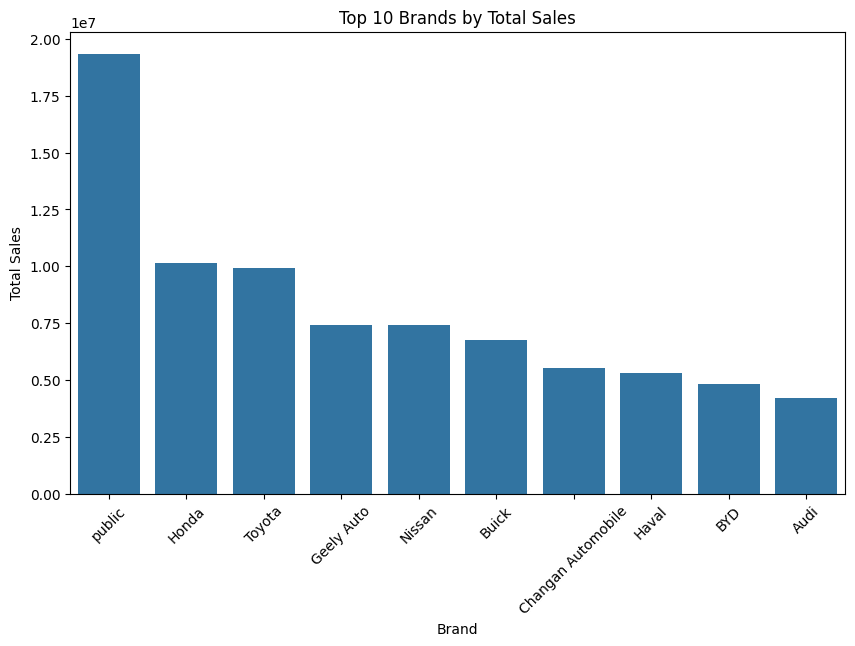

In [4]:
# Top 10 brands by total sales
top_brands = df.groupby(brand_col)[sales_col].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Top 10 Brands by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Update these according to df.columns output
sales_col = "Sales"              # your sales column
brand_col = "Brand"              # brand column
year_col = "购买年份"             # <-- replace with actual year col name
month_col = "购买月份"            # <-- replace with actual month col name
price_col = "裸车价格"           # <-- replace with actual price col name


In [11]:
sales_col = "???"   # whatever your sales column is called
brand_col = "???"   # whatever your brand column is called
year_col  = "???"   # purchase year / review year
month_col = "???"   # purchase month / review month
price_col = "???"   # car price column


In [13]:
print(df.columns.tolist())


['Car Series', 'Brand', 'Sales Year', 'Sales Month', 'Car Series Type', 'Brand Energy Type', 'Car Size', 'Brand Origin Country', 'First Launch Year', 'Brand Founded Year', 'Brand Entry to China Year', 'Sales']


In [14]:
sales_col = "Sales"
brand_col = "Brand"
year_col  = "Sales Year"
month_col = "Sales Month"
# No price column in this dataset – skip price-based plots


      Car Series      Brand  Sales Year  Sales Month Car Series Type  \
0  A5 Wing Dance  southeast        2018           11           Sedan   
1  A5 Wing Dance  southeast        2018           12           Sedan   
2  A5 Wing Dance  southeast        2019            1           Sedan   
3  A5 Wing Dance  southeast        2019            2           Sedan   
4  A5 Wing Dance  southeast        2019            3           Sedan   

       Brand Energy Type     Car Size Brand Origin Country  First Launch Year  \
0  Traditional Car Brand  Compact Car                China               2018   
1  Traditional Car Brand  Compact Car                China               2018   
2  Traditional Car Brand  Compact Car                China               2018   
3  Traditional Car Brand  Compact Car                China               2018   
4  Traditional Car Brand  Compact Car                China               2018   

   Brand Founded Year  Brand Entry to China Year  Sales  
0                1995 

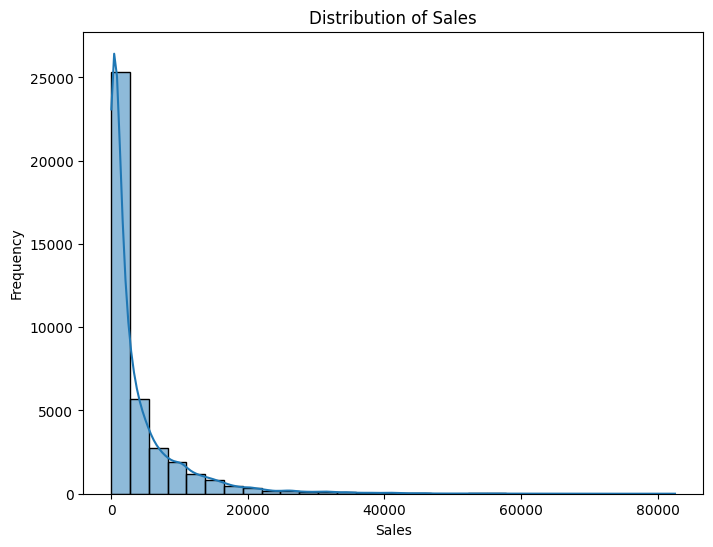

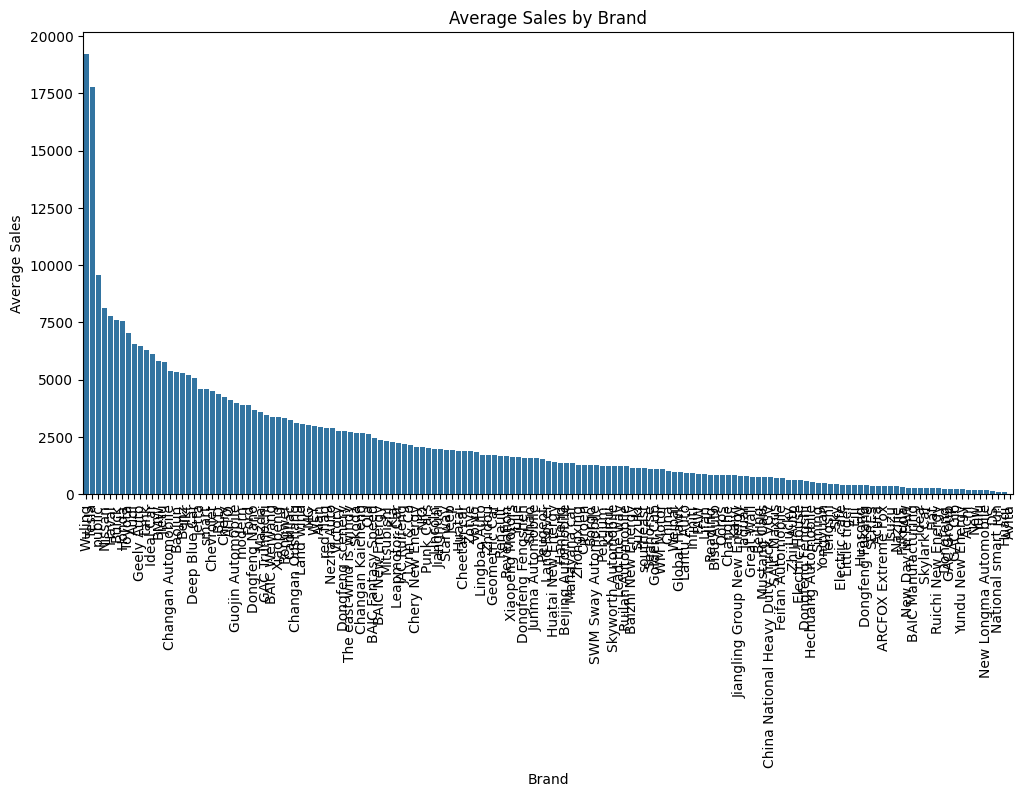

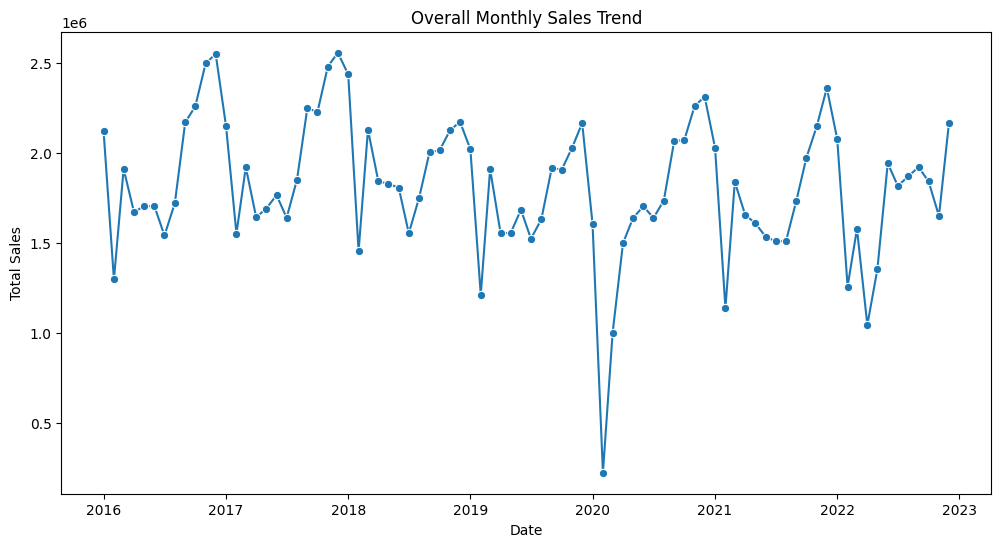

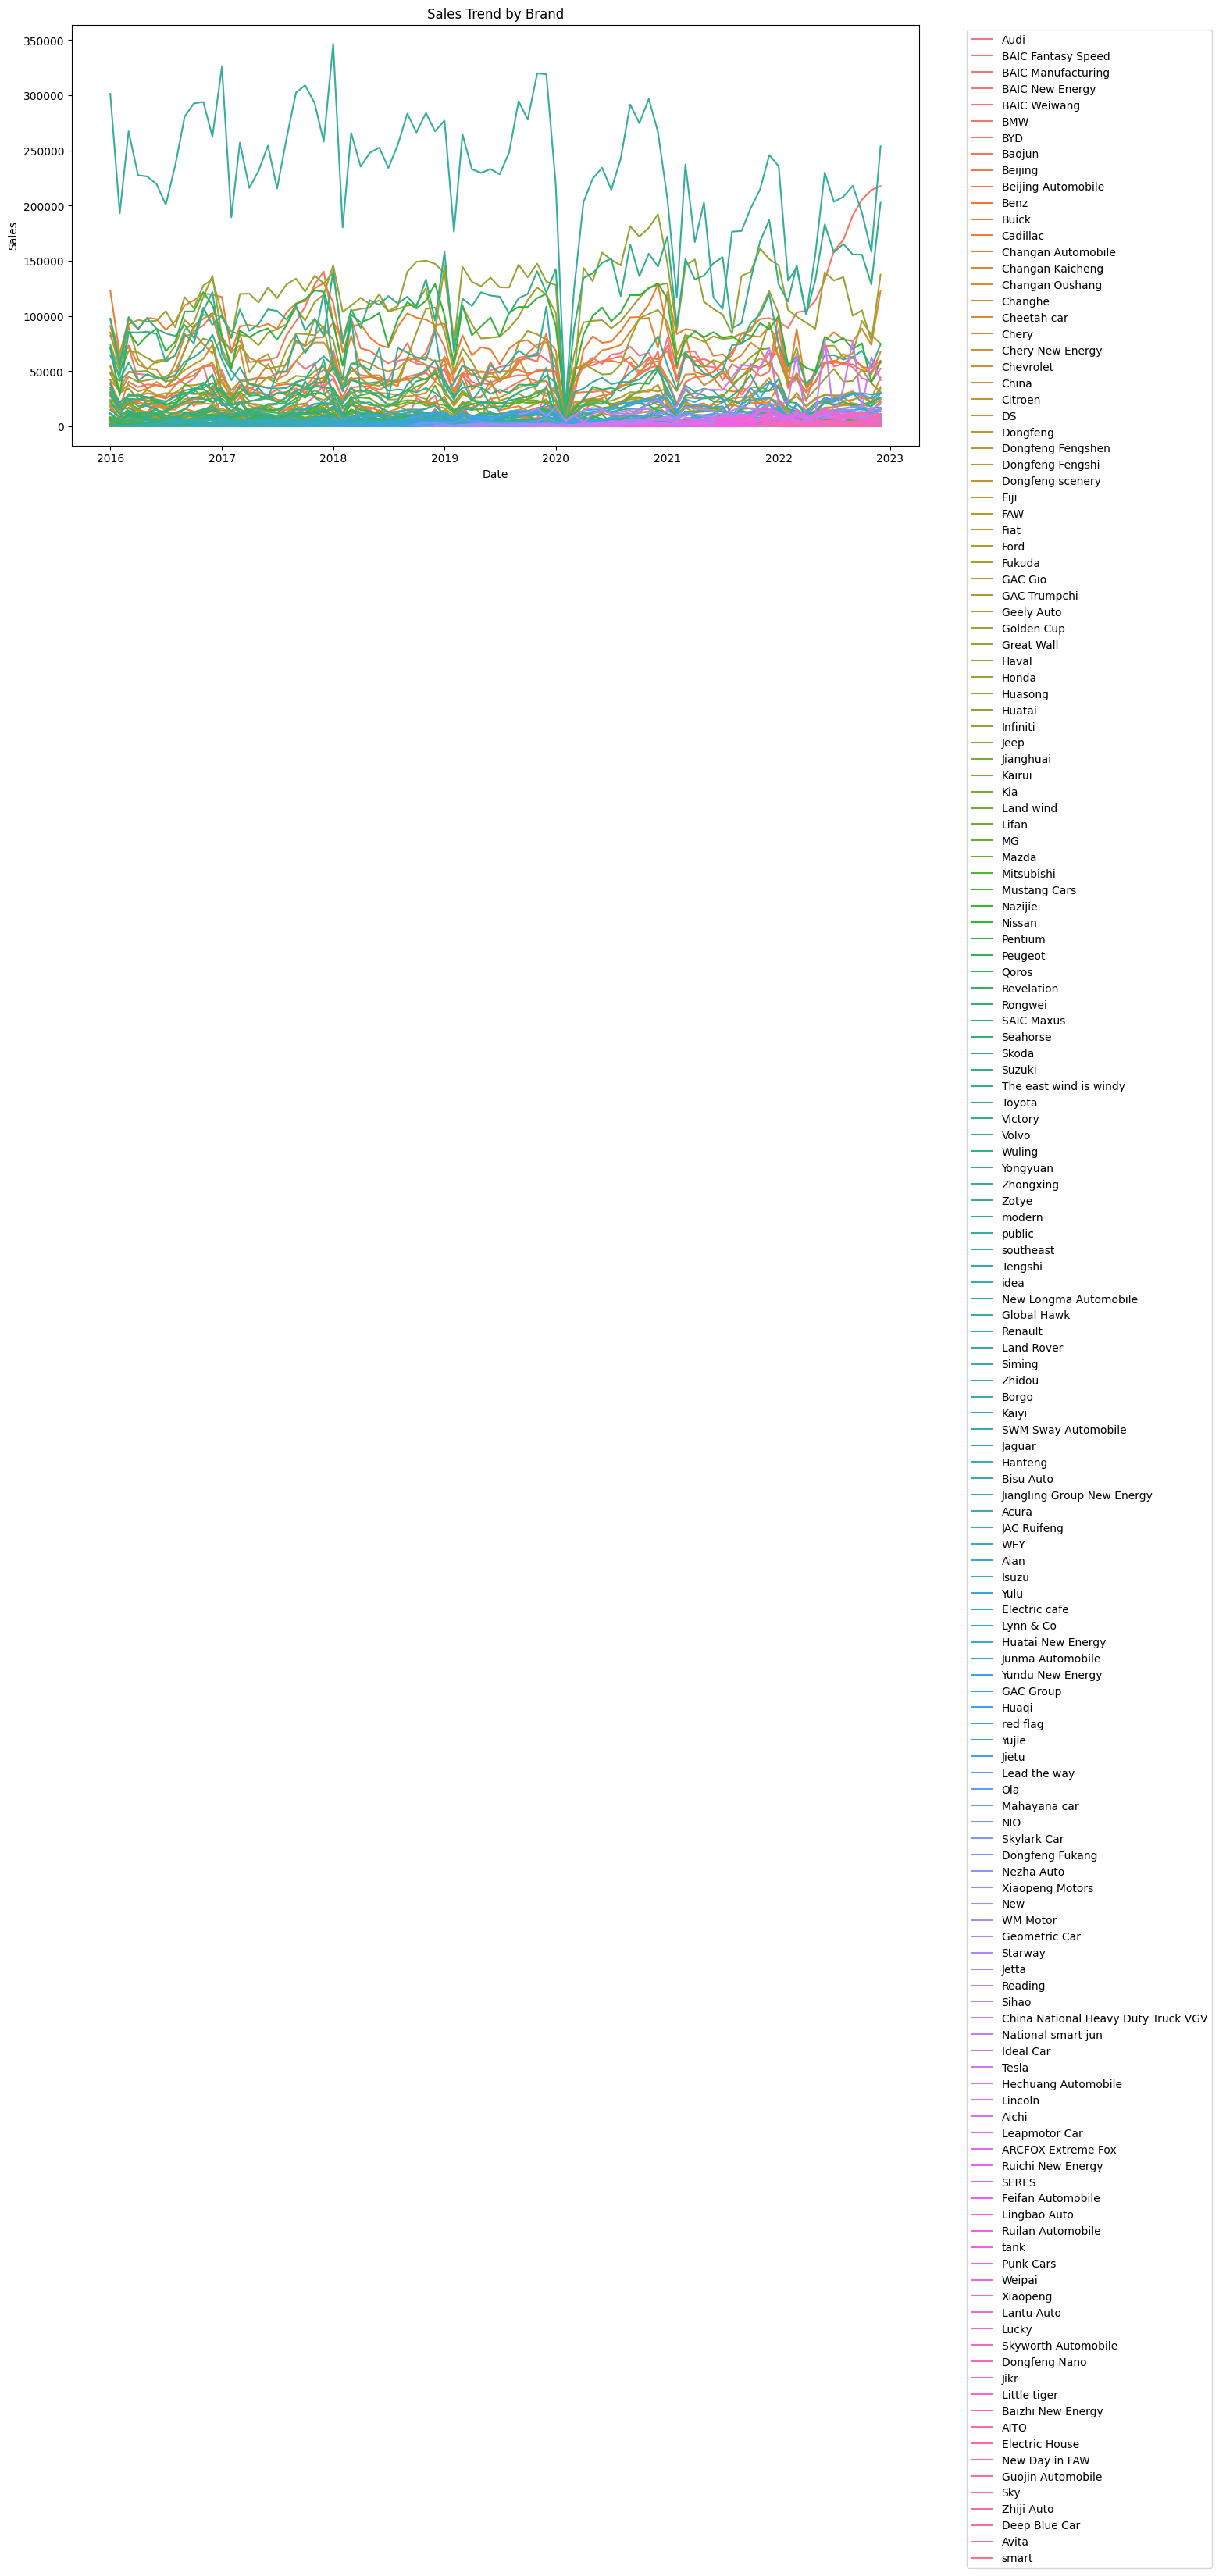

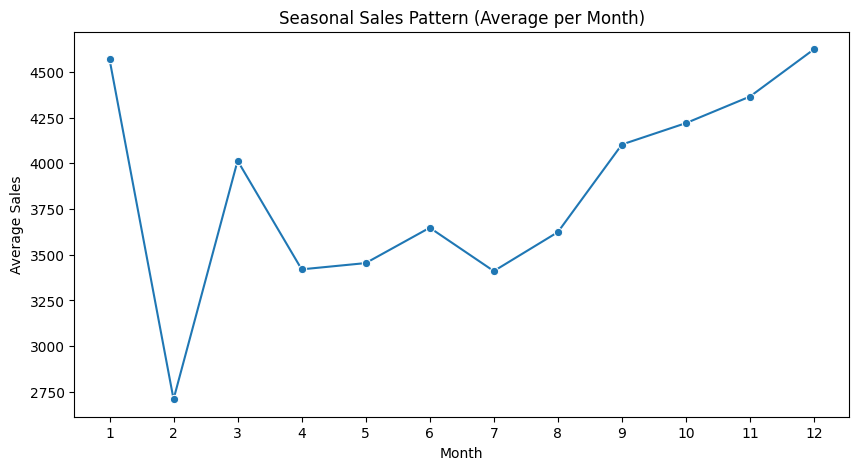

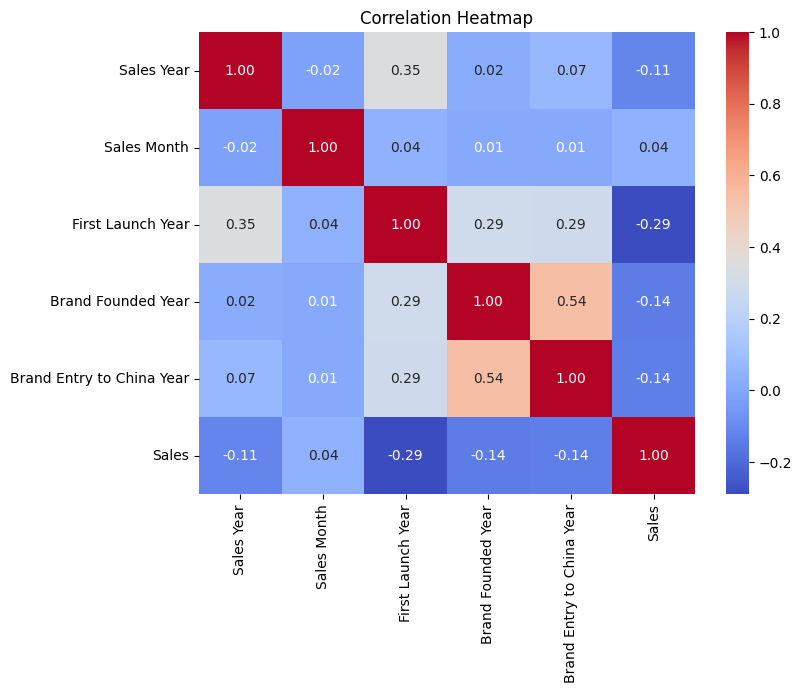

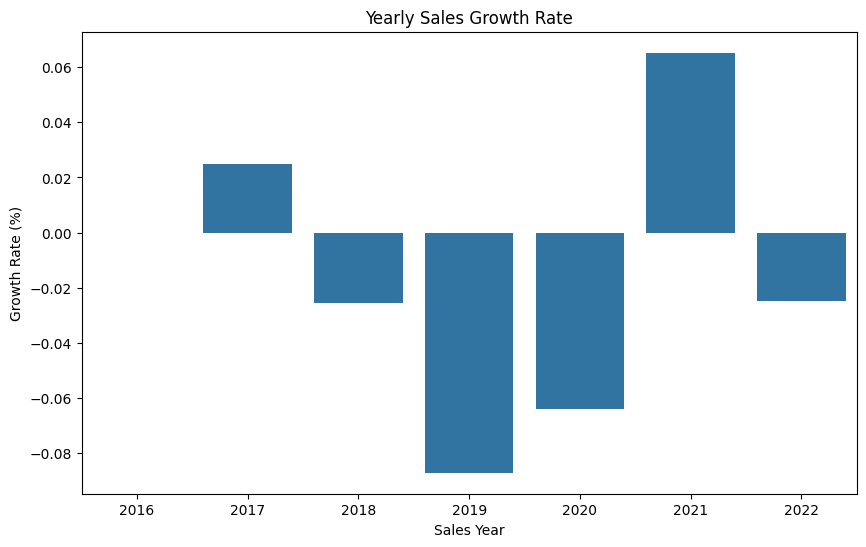

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("Sales_English_Translated.xlsx")

# Set column variables
sales_col = "Sales"
brand_col = "Brand"
year_col  = "Sales Year"
month_col = "Sales Month"

# Quick overview
print(df.head())
print(df.info())
print(df.describe())

# 1. Sales Distribution
plt.figure(figsize=(8,6))
sns.histplot(df[sales_col], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# 2. Average Sales by Brand
plt.figure(figsize=(12,6))
brand_sales = df.groupby(brand_col)[sales_col].mean().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values)
plt.xticks(rotation=90)
plt.title("Average Sales by Brand")
plt.ylabel("Average Sales")
plt.show()

# 3. Monthly Sales Trend (all brands combined)
df['Date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col].astype(str) + '-01')
monthly_sales = df.groupby('Date')[sales_col].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y=sales_col, data=monthly_sales, marker="o")
plt.title("Overall Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# 4. Sales Trend by Brand
brand_trends = df.groupby([year_col, month_col, brand_col])[sales_col].sum().reset_index()
brand_trends['Date'] = pd.to_datetime(brand_trends[year_col].astype(str) + '-' + brand_trends[month_col].astype(str) + '-01')

plt.figure(figsize=(14,7))
sns.lineplot(x="Date", y=sales_col, hue=brand_col, data=brand_trends)
plt.title("Sales Trend by Brand")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 5. Seasonal Analysis (average sales per month across all years)
monthly_pattern = df.groupby(month_col)[sales_col].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_pattern.index, y=monthly_pattern.values, marker="o")
plt.title("Seasonal Sales Pattern (Average per Month)")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1,13))
plt.show()

# 6. Correlation Heatmap of numeric features
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 7. Yearly Sales Growth
yearly_sales = df.groupby(year_col)[sales_col].sum().pct_change().reset_index()
yearly_sales.columns = [year_col, "Growth Rate"]

plt.figure(figsize=(10,6))
sns.barplot(x=year_col, y="Growth Rate", data=yearly_sales)
plt.title("Yearly Sales Growth Rate")
plt.ylabel("Growth Rate (%)")
plt.show()
